In [2]:
import pandas
import librosa
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.ndimage import zoom

In [3]:
filepath = "./dataset/ESC-50-master/meta/esc50.csv"

In [4]:
dataset = pandas.read_csv(filepath)

print(dataset.head())

            filename  fold  target        category  esc10  src_file take
0   1-100032-A-0.wav     1       0             dog   True    100032    A
1  1-100038-A-14.wav     1      14  chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36  vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36  vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19    thunderstorm  False    101296    A


In [5]:
# get car horn audios
car_horn_dataset = []
for idx, data in enumerate(dataset["category"], 0):
    if(data == "car_horn"):
        car_horn_dataset.append(dataset.loc[idx])

print(car_horn_dataset)

[filename    1-17124-A-43.wav
fold                       1
target                    43
category            car_horn
esc10                  False
src_file               17124
take                       A
Name: 53, dtype: object, filename    1-19026-A-43.wav
fold                       1
target                    43
category            car_horn
esc10                  False
src_file               19026
take                       A
Name: 83, dtype: object, filename    1-24074-A-43.wav
fold                       1
target                    43
category            car_horn
esc10                  False
src_file               24074
take                       A
Name: 124, dtype: object, filename    1-24076-A-43.wav
fold                       1
target                    43
category            car_horn
esc10                  False
src_file               24076
take                       A
Name: 125, dtype: object, filename    1-254507-A-43.wav
fold                        1
target                   

In [6]:
SAMPLING_RATE = 16000

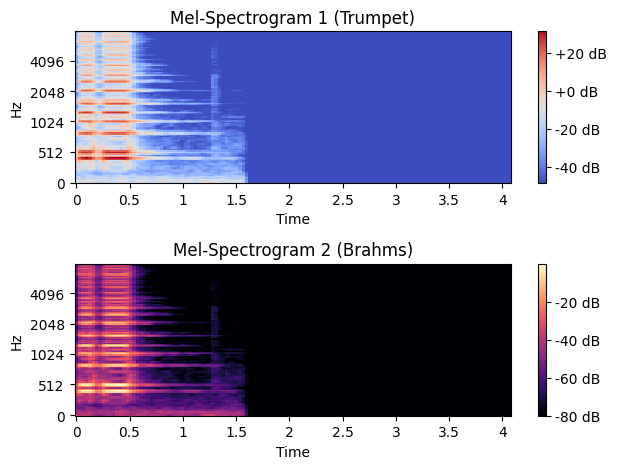

In [8]:
def convert_to_log_scale(spectro):
    # Convert to log scale
    log_spectro = librosa.power_to_db(spectro)

    log_spectro = zoom(log_spectro, (128/log_spectro.shape[0], 128/log_spectro.shape[1]), order=1)  # SciPy

    return log_spectro

# Load an audio file
audio, sr = librosa.load('./dataset/ESC-50-master/audio/1-19026-A-43.wav', sr=SAMPLING_RATE)

# Convert audio to Mel-spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=8000)

# Convert to log scale
log_mel_spectrogram = convert_to_log_scale(mel_spectrogram)

# Normalized version
S = mel_spectrogram
S_min = S.min()
S_max = S.max()

mel_spectrogram_normalized = (S - S_min) / (S_max - S_min)

log_mel_spectrogram_normalized = convert_to_log_scale(mel_spectrogram_normalized)

# Plot the first Mel-spectrogram
plt.subplot(2, 1, 1)  # 2 rows, 1 column, position 1
librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram 1 (Trumpet)')

# Plot the second Mel-spectrogram
plt.subplot(2, 1, 2)  # 2 rows, 1 column, position 2
librosa.display.specshow(log_mel_spectrogram_normalized, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram 2 (Brahms)')

# Display the plots
plt.tight_layout()
plt.show()

In [8]:
def preprocess_wav(filepath):
    # Load an audio file
    audio, sr = librosa.load(filepath, sr=SAMPLING_RATE)

    # Convert audio to Mel-spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128, fmax=8000)

    # Normalized version
    S = mel_spectrogram
    S_min = S.min()
    S_max = S.max()

    mel_spectrogram = (S - S_min) / (S_max - S_min)

    # Convert to log scale
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

    log_mel_spectrogram = zoom(log_mel_spectrogram, (128/log_mel_spectrogram.shape[0], 128/log_mel_spectrogram.shape[1]), order=1)  # SciPy
    # Normalize and reshape the data
    # log_mel_spectrogram = log_mel_spectrogram / np.max(log_mel_spectrogram)

    log_mel_spectrogram = np.expand_dims(log_mel_spectrogram, axis=-1)  # Add channel dimension
    # log_mel_spectrogram = np.expand_dims(log_mel_spectrogram, axis=0)   # Add batch dimension

    return log_mel_spectrogram

In [9]:
# store mels
car_horn_mels = []

for idx, data in enumerate(car_horn_dataset):
    path = data["filename"]
    path = f"./dataset/ESC-50-master/audio/{path}"

    print(path)

    log_mel_spectogram = preprocess_wav(path)

    car_horn_mels.append(log_mel_spectogram)


./dataset/ESC-50-master/audio/1-17124-A-43.wav
./dataset/ESC-50-master/audio/1-19026-A-43.wav
./dataset/ESC-50-master/audio/1-24074-A-43.wav
./dataset/ESC-50-master/audio/1-24076-A-43.wav
./dataset/ESC-50-master/audio/1-254507-A-43.wav
./dataset/ESC-50-master/audio/1-26176-A-43.wav
./dataset/ESC-50-master/audio/1-26177-A-43.wav
./dataset/ESC-50-master/audio/1-28808-A-43.wav
./dataset/ESC-50-master/audio/2-100648-A-43.wav
./dataset/ESC-50-master/audio/2-125520-A-43.wav
./dataset/ESC-50-master/audio/2-128465-A-43.wav
./dataset/ESC-50-master/audio/2-128465-B-43.wav
./dataset/ESC-50-master/audio/2-138465-A-43.wav
./dataset/ESC-50-master/audio/2-144137-A-43.wav
./dataset/ESC-50-master/audio/2-42101-A-43.wav
./dataset/ESC-50-master/audio/2-54086-A-43.wav
./dataset/ESC-50-master/audio/3-145577-A-43.wav
./dataset/ESC-50-master/audio/3-146697-A-43.wav
./dataset/ESC-50-master/audio/3-153057-A-43.wav
./dataset/ESC-50-master/audio/3-155130-A-43.wav
./dataset/ESC-50-master/audio/3-155234-A-43.wav
.

In [10]:
CAR_HORN_MELS_FILENAME = './car_horn_mels.npy'
TRAFFIC_NOISES_FILENAME = './traffic_noises_mels.npy'


In [11]:
# Save to a NumPy binary file
np_car_horn_mels = np.array(car_horn_mels)
np.save(CAR_HORN_MELS_FILENAME, np_car_horn_mels)

(128, 128)


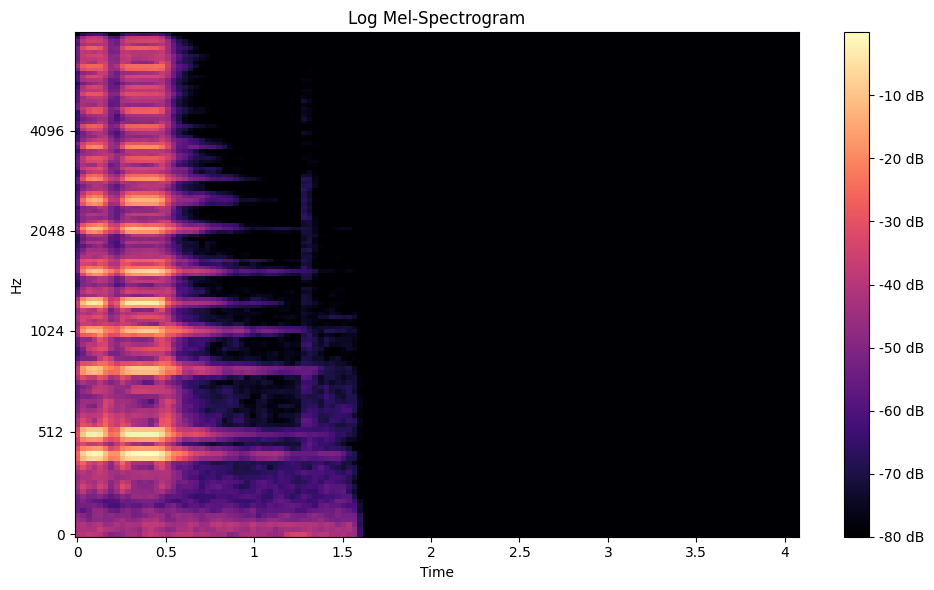

In [12]:
load_car_horn_mels = np.load(CAR_HORN_MELS_FILENAME)

log_mel_spectrogram = load_car_horn_mels[1].reshape(128,128)

print(np.array(log_mel_spectrogram).shape)

# Plot the Mel-spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(log_mel_spectrogram, sr=SAMPLING_RATE, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel-Spectrogram')
plt.tight_layout()
plt.show()

In [13]:
# Create traffic noise dataset

filepath = './dataset/traffic_noise/data.wav'
segment_duration = 5 #seconds
segment_count_total = 40

# Load an audio file
audio, sr = librosa.load(filepath, sr=SAMPLING_RATE)

# Calculate samples per segment
samples_per_segment = int(segment_duration * sr)

# Split audio into segments
segments = []
for start in range(0, len(audio), samples_per_segment):
    end = start + samples_per_segment
    segment = audio[start:end]
    segments.append(segment)

    print(f"processing segment-{len(segments)}")

    if(len(segments) >= segment_count_total) :
        break

segment_mels = []

for idx, segment in enumerate(segments):
    # Convert audio to Mel-spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=segment, sr=sr, n_mels=128, fmax=8000)

    # Normalized version
    S = mel_spectrogram
    S_min = S.min()
    S_max = S.max()

    mel_spectrogram = (S - S_min) / (S_max - S_min)
    
    # Convert to log scale
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

    log_mel_spectrogram = zoom(log_mel_spectrogram, (128/log_mel_spectrogram.shape[0], 128/log_mel_spectrogram.shape[1]), order=1)  # SciPy

    log_mel_spectrogram = np.expand_dims(log_mel_spectrogram, axis=-1)  # Add channel dimension
    print(np.array(log_mel_spectrogram).shape)
    
    segment_mels.append(log_mel_spectrogram)
# Save to a NumPy binary file
np_traffic_noises = np.array(segment_mels)
np.save(TRAFFIC_NOISES_FILENAME, np_traffic_noises)

processing segment-1
processing segment-2
processing segment-3
processing segment-4
processing segment-5
processing segment-6
processing segment-7
processing segment-8
processing segment-9
processing segment-10
processing segment-11
processing segment-12
processing segment-13
processing segment-14
processing segment-15
processing segment-16
processing segment-17
processing segment-18
processing segment-19
processing segment-20
processing segment-21
processing segment-22
processing segment-23
processing segment-24
processing segment-25
processing segment-26
processing segment-27
processing segment-28
processing segment-29
processing segment-30
processing segment-31
processing segment-32
processing segment-33
processing segment-34
processing segment-35
processing segment-36
processing segment-37
processing segment-38
processing segment-39
processing segment-40
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(128, 128, 1)
(12

(128, 128)


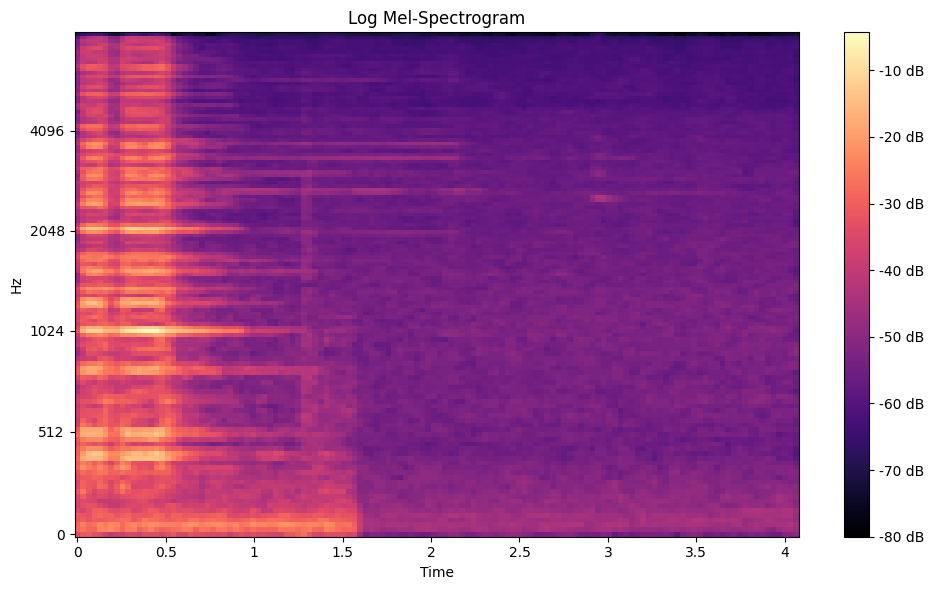

In [14]:
load_traffic_noises = np.load(TRAFFIC_NOISES_FILENAME)

traffic = load_traffic_noises[1].reshape(128,128)
car = load_car_horn_mels[1].reshape(128,128)

log_mel_spectrogram = (traffic + car) / 2

print(np.array(log_mel_spectrogram).shape)

# Plot the Mel-spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(log_mel_spectrogram, sr=SAMPLING_RATE, x_axis='time', y_axis='mel', fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Log Mel-Spectrogram')
plt.tight_layout()
plt.show()